# This notebook demenstrate how to convert a Pytorch model to NCNN model using yolov5s.pt as an example

## Setup
Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt).
Skip this step if you all ready install yolov5``

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirement.txt comet_ml

In [1]:
import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5  v7.0-237-gd50a879 Python-3.11.4 torch-2.0.1+cpu CPU


Setup complete  (8 CPUs, 7.8 GB RAM, 176.5/244.1 GB disk)


## 1. Test model yolov5s.pt

detect: weights=['yolov5s.pt'], source=data/images/bus.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=output, name=exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-237-gd50a879 Python-3.11.4 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 D:\Projects\Python\yolov5\data\images\bus.jpg: 640x480 4 persons, 1 bus, 281.5ms
Speed: 1.0ms pre-process, 281.5ms inference, 2.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to output\exp
1 labels saved to output\exp\labels


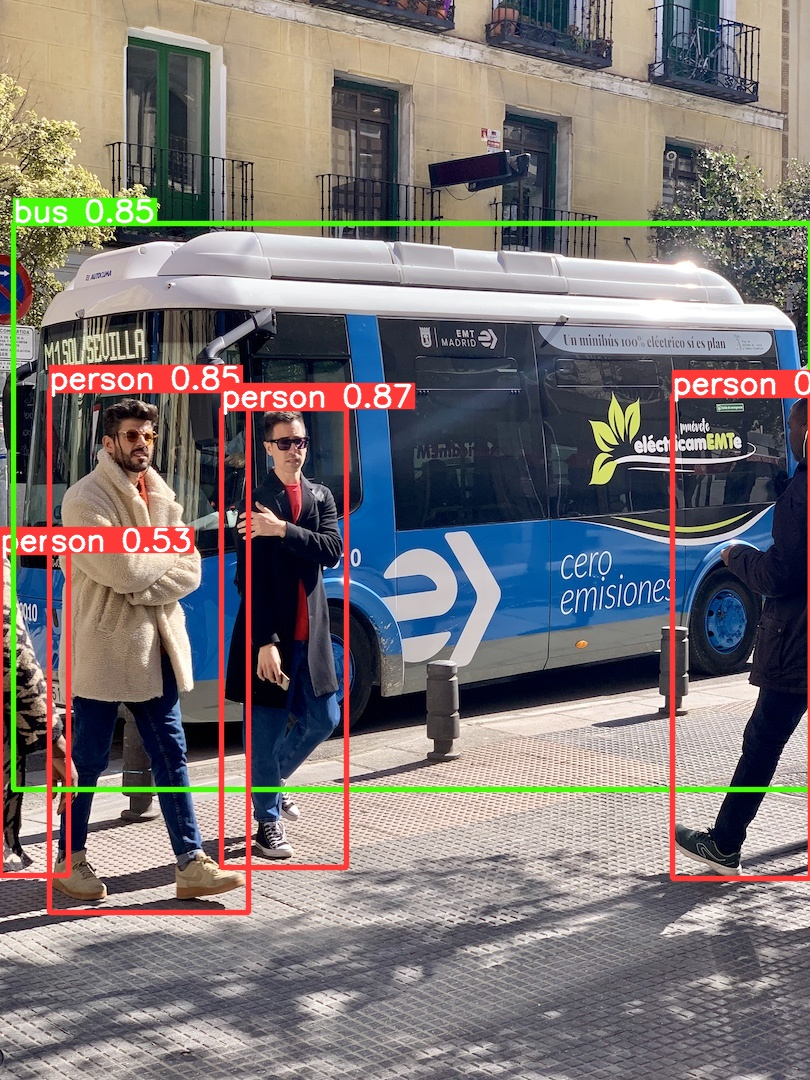

In [7]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/bus.jpg --project output --exist-ok --save-txt --save-conf
display.Image(filename='output/exp/bus.jpg', width=600)

## 2. Export to torchscript

In [6]:
!python export.py --weights yolov5s.pt --include torchscript --data data/coco128.yaml

export: data=data/coco128.yaml, weights=['yolov5s.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript']
YOLOv5  v7.0-237-gd50a879 Python-3.11.4 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients

PyTorch: starting from yolov5s.pt with output shape (1, 25200, 85) (14.1 MB)

TorchScript: starting export with torch 2.0.1+cpu...
TorchScript: export success  4.4s, saved as yolov5s.torchscript (28.1 MB)

Export complete (5.5s)
Results saved to D:\Projects\Python\yolov5
Detect:          python detect.py --weights yolov5s.torchscript 
Validate:        python val.py --weights yolov5s.torchscript 
PyTorch Hub:     model = torch.hub.load('ultralytics/yolov5', 'custom', 'yolov5s.torchscript')  
Visu

## 3. Test the converted torchscript model

detect: weights=['yolov5s.torchscript'], source=data/images/bus.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=output, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-237-gd50a879 Python-3.11.4 torch-2.0.1+cpu CPU

Loading yolov5s.torchscript for TorchScript inference...
image 1/1 D:\Projects\Python\yolov5\data\images\bus.jpg: 640x640 4 persons, 1 bus, 892.4ms
Speed: 22.4ms pre-process, 892.4ms inference, 30.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to output\exp2
1 labels saved to output\exp2\labels


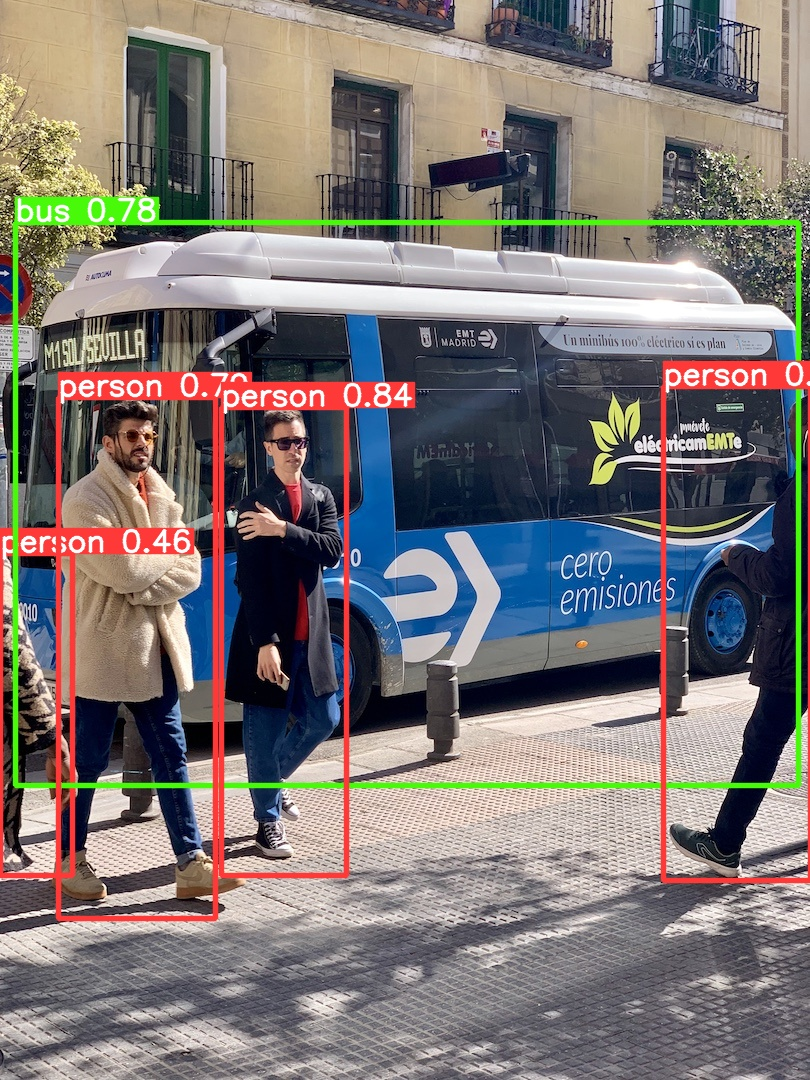

In [11]:
!python detect.py --weights yolov5s.torchscript --img 640 --conf 0.25 --source data/images/bus.jpg --project output --save-txt --save-conf
display.Image(filename='output/exp2/bus.jpg', width=600)

## 4. Convert torchscript to ncnn
After this step, you should see 2 files : *yolov5s.ncnn.param* and *yolov5s.ncnn.bin*

### 4.1 Build or Download PNNX
Build according to [this](https://github.com/pnnx/pnnx) tutorial or alternatively, download [this](https://github.com/pnnx/pnnx/releases) prebuild binary.

After you have the pnnx.exe file, add it to the system environment variable or move it to this working directory. You can use the following command to check which directory are you on. In my case, it is the yolov5 folder

In [3]:
import os
os.getcwd()

'd:\\Projects\\Python\\yolov5'

### 4.2 Run pnnx

In [12]:
!pnnx yolov5s.torchscript inputshape=[1,3,640,640]

pnnxparam = yolov5s.pnnx.param
pnnxbin = yolov5s.pnnx.bin
pnnxpy = yolov5s_pnnx.py
pnnxonnx = yolov5s.pnnx.onnx
ncnnparam = yolov5s.ncnn.param
ncnnbin = yolov5s.ncnn.bin
ncnnpy = yolov5s_ncnn.py
fp16 = 1
optlevel = 2
device = cpu
inputshape = [1,3,640,640]f32
inputshape2 = 
customop = 
moduleop = 
############# pass_level0
inline module = models.common.Bottleneck
inline module = models.common.C3
inline module = models.common.Concat
inline module = models.common.Conv
inline module = models.common.SPPF
inline module = models.yolo.Detect
inline module = models.common.Bottleneck
inline module = models.common.C3
inline module = models.common.Concat
inline module = models.common.Conv
inline module = models.common.SPPF
inline module = models.yolo.Detect

----------------

############# pass_level1
unknown Parameter value kind prim::Constant of TensorType, t.dim = 5
unknown Parameter value kind prim::Constant of TensorType, t.dim = 5
unknown Parameter value kind prim::Constant of TensorType, t

In [2]:
# Run this command for more information
!pnnx --help

Usage: pnnx [model.pt] [(key=value)...]
  pnnxparam=model.pnnx.param
  pnnxbin=model.pnnx.bin
  pnnxpy=model_pnnx.py
  pnnxonnx=model.pnnx.onnx
  ncnnparam=model.ncnn.param
  ncnnbin=model.ncnn.bin
  ncnnpy=model_ncnn.py
  fp16=1
  optlevel=2
  device=cpu/gpu
  inputshape=[1,3,224,224],...
  inputshape2=[1,3,320,320],...
  customop=C:\Users\nihui\AppData\Local\torch_extensions\torch_extensions\Cache\fused\fused.dll,...
  moduleop=models.common.Focus,models.yolo.Detect,...
Sample usage: pnnx mobilenet_v2.pt inputshape=[1,3,224,224]
              pnnx yolov5s.pt inputshape=[1,3,640,640]f32 inputshape2=[1,3,320,320]f32 device=gpu moduleop=models.common.Focus,models.yolo.Detect


## 5. Test ncnn model using C++